In [2]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'http://openapi.seoul.go.kr:8088/6445776e7562696b3437517272436e/json/CardSubwayTime/1/1000/202111'

In [4]:
response = urllib.request.urlopen('http://openapi.seoul.go.kr:8088/6445776e7562696b3437517272436e/json/CardSubwayTime/1/1000/202111') 
json_str = response.read().decode("utf-8")

In [5]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayTime': {'list_total_count': 609,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_MON': '202111',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'FOUR_RIDE_NUM': 630.0,
    'FOUR_ALIGHT_NUM': 11.0,
    'FIVE_RIDE_NUM': 8985.0,
    'FIVE_ALIGHT_NUM': 7058.0,
    'SIX_RIDE_NUM': 12028.0,
    'SIX_ALIGHT_NUM': 40803.0,
    'SEVEN_RIDE_NUM': 36492.0,
    'SEVEN_ALIGHT_NUM': 93181.0,
    'EIGHT_RIDE_NUM': 61857.0,
    'EIGHT_ALIGHT_NUM': 196998.0,
    'NINE_RIDE_NUM': 48518.0,
    'NINE_ALIGHT_NUM': 131911.0,
    'TEN_RIDE_NUM': 49785.0,
    'TEN_ALIGHT_NUM': 67104.0,
    'ELEVEN_RIDE_NUM': 57296.0,
    'ELEVEN_ALIGHT_NUM': 57503.0,
    'TWELVE_RIDE_NUM': 67212.0,
    'TWELVE_ALIGHT_NUM': 64828.0,
    'THIRTEEN_RIDE_NUM': 68923.0,
    'THIRTEEN_ALIGHT_NUM': 62027.0,
    'FOURTEEN_RIDE_NUM': 59146.0,
    'FOURTEEN_ALIGHT_NUM': 58165.0,
    'FIFTEEN_RIDE_NUM': 78671.0,
    'FIFTEEN_ALIGHT_NUM': 61463.0,
    'SIXTEEN_RIDE_NUM': 88156.0,
    'SIXTEEN_A

In [6]:
df=pd.json_normalize(json_object['CardSubwayTime']['row'])
df

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202111,1호선,서울역,630.0,11.0,8985.0,7058.0,12028.0,40803.0,36492.0,...,12360.0,101.0,1257.0,1.0,3.0,2.0,2.0,0.0,0.0,20211203
1,202111,1호선,동묘앞,141.0,1.0,2570.0,907.0,3387.0,4074.0,5711.0,...,2974.0,8.0,2017.0,0.0,2.0,0.0,0.0,0.0,0.0,20211203
2,202111,1호선,시청,30.0,0.0,2006.0,4859.0,2980.0,19785.0,6504.0,...,2196.0,65.0,309.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
3,202111,1호선,종각,118.0,1.0,2639.0,3960.0,3158.0,20401.0,5614.0,...,2786.0,212.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
4,202111,1호선,종로3가,223.0,21.0,3177.0,3136.0,3328.0,12386.0,4372.0,...,3463.0,135.0,914.0,0.0,1.0,1.0,0.0,0.0,0.0,20211203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,202111,중앙선,오빈,6.0,0.0,227.0,0.0,446.0,252.0,942.0,...,300.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
605,202111,중앙선,양평,53.0,2.0,1337.0,98.0,3102.0,2357.0,5853.0,...,2619.0,13.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
606,202111,중앙선,원덕,62.0,0.0,309.0,2.0,677.0,155.0,669.0,...,309.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
607,202111,중앙선,용문,384.0,1.0,994.0,5.0,1966.0,649.0,2930.0,...,1188.0,0.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203


In [ ]:
startnumber=1
endnumber= 1000
timeInfor = {}

## 자료구조에 삽입하기 위한 list (1호선 서울역 예시) , # 카페 영업시간을 고려 오전 7시 ~ 오후 10시까지의 데이터만 추출
#<USE_MON>202111</USE_MON>
#<LINE_NUM>1호선</LINE_NUM>
#<SUB_STA_NM>서울역</SUB_STA_NM>
#<FOUR_RIDE_NUM>630</FOUR_RIDE_NUM>
#<FOUR_ALIGHT_NUM>11</FOUR_ALIGHT_NUM>
#<FIVE_RIDE_NUM>8985</FIVE_RIDE_NUM>
#<FIVE_ALIGHT_NUM>7058</FIVE_ALIGHT_NUM>
#<SIX_RIDE_NUM>12028</SIX_RIDE_NUM>
#<SIX_ALIGHT_NUM>40803</SIX_ALIGHT_NUM>
#<SEVEN_RIDE_NUM>36492</SEVEN_RIDE_NUM>
#<SEVEN_ALIGHT_NUM>93181</SEVEN_ALIGHT_NUM>
#<EIGHT_RIDE_NUM>61857</EIGHT_RIDE_NUM>
#<EIGHT_ALIGHT_NUM>196998</EIGHT_ALIGHT_NUM>
#<NINE_RIDE_NUM>48518</NINE_RIDE_NUM>
#<NINE_ALIGHT_NUM>131911</NINE_ALIGHT_NUM>
#<TEN_RIDE_NUM>49785</TEN_RIDE_NUM>
#<TEN_ALIGHT_NUM>67104</TEN_ALIGHT_NUM>
#<ELEVEN_RIDE_NUM>57296</ELEVEN_RIDE_NUM>
#<ELEVEN_ALIGHT_NUM>57503</ELEVEN_ALIGHT_NUM>
#<TWELVE_RIDE_NUM>67212</TWELVE_RIDE_NUM>
#<TWELVE_ALIGHT_NUM>64828</TWELVE_ALIGHT_NUM>
#<THIRTEEN_RIDE_NUM>68923</THIRTEEN_RIDE_NUM>
#<THIRTEEN_ALIGHT_NUM>62027</THIRTEEN_ALIGHT_NUM>
#<FOURTEEN_RIDE_NUM>59146</FOURTEEN_RIDE_NUM>
#<FOURTEEN_ALIGHT_NUM>58165</FOURTEEN_ALIGHT_NUM>
#<FIFTEEN_RIDE_NUM>78671</FIFTEEN_RIDE_NUM>
#<FIFTEEN_ALIGHT_NUM>61463</FIFTEEN_ALIGHT_NUM>
#<SIXTEEN_RIDE_NUM>88156</SIXTEEN_RIDE_NUM>
#<SIXTEEN_ALIGHT_NUM>65725</SIXTEEN_ALIGHT_NUM>
#<SEVENTEEN_RIDE_NUM>136669</SEVENTEEN_RIDE_NUM>
#<SEVENTEEN_ALIGHT_NUM>75650</SEVENTEEN_ALIGHT_NUM>
#<EIGHTEEN_RIDE_NUM>198548</EIGHTEEN_RIDE_NUM>
#<EIGHTEEN_ALIGHT_NUM>82448</EIGHTEEN_ALIGHT_NUM>
#<NINETEEN_RIDE_NUM>93839</NINETEEN_RIDE_NUM>
#<NINETEEN_ALIGHT_NUM>51787</NINETEEN_ALIGHT_NUM>
#<TWENTY_RIDE_NUM>65417</TWENTY_RIDE_NUM>
#<TWENTY_ALIGHT_NUM>34209</TWENTY_ALIGHT_NUM>
#<TWENTY_ONE_RIDE_NUM>70807</TWENTY_ONE_RIDE_NUM>
#<TWENTY_ONE_ALIGHT_NUM>29311</TWENTY_ONE_ALIGHT_NUM>
#<TWENTY_TWO_RIDE_NUM>46511</TWENTY_TWO_RIDE_NUM>
#<TWENTY_TWO_ALIGHT_NUM>21788</TWENTY_TWO_ALIGHT_NUM>
#<TWENTY_THREE_RIDE_NUM>17275</TWENTY_THREE_RIDE_NUM>
#<TWENTY_THREE_ALIGHT_NUM>12360</TWENTY_THREE_ALIGHT_NUM>
#<MIDNIGHT_RIDE_NUM>101</MIDNIGHT_RIDE_NUM>
#<MIDNIGHT_ALIGHT_NUM>1257</MIDNIGHT_ALIGHT_NUM>
#<ONE_RIDE_NUM>1</ONE_RIDE_NUM>
#<ONE_ALIGHT_NUM>3</ONE_ALIGHT_NUM>
#<TWO_RIDE_NUM>2</TWO_RIDE_NUM>
#<TWO_ALIGHT_NUM>2</TWO_ALIGHT_NUM>
#<THREE_RIDE_NUM>0</THREE_RIDE_NUM>
#<THREE_ALIGHT_NUM>0</THREE_ALIGHT_NUM>

line_num_list = [] # 호선명
sub_sta_nm_list = [] # 역명
SEVEN_RIDE_NUM_list = [] # 오전7시 승차합산인원
SEVEN_ALIGHT_NUM_list = [] # 오전7시 하차합산인원
EIGHT_RIDE_NUM_list =[]
EIGHT_ALIGHT_NUM_list = []
NINE_RIDE_NUM_list = []
NINE_ALIGHT_NUM_list = []
TEN_RIDE_NUM_list =[]
TEN_ALIGHT_NUM_list = []
ELEVEN_RIDE_NUM_list = []
ELEVEN_ALIGHT_NUM_list = []
TWELVE_RIDE_NUM_list = []
TWELVE_ALIGHT_NUM_list = []
THIRTEEN_RIDE_NUM_list = []
THIRTEEN_ALIGHT_NUM_list =[]
FOURTEEN_RIDE_NUM_list = []
FOURTEEN_ALIGHT_NUM_list = []
FIFTEEN_RIDE_NUM_list = []
FIFTEEN_ALIGHT_NUM_list = []
SIXTEEN_RIDE_NUM_list = []
SIXTEEN_ALIGHT_NUM_list = []
SEVENTEEN_RIDE_NUM_list = []
SEVENTEEN_ALIGHT_NUM_list = []
EIGHTEEN_RIDE_NUM_list = []
EIGHTEEN_ALIGHT_NUM_list = []
NINETEEN_RIDE_NUM_list = []
NINETEEN_ALIGHT_NUM_list = []
TWENTY_RIDE_NUM_list = []
TWENTY_ALIGHT_NUM_list = []
TWENTY_ONE_RIDE_NUM_list = []
TWENTY_ONE_ALIGHT_NUM_list = []
TWENTY_TWO_RIDE_NUM_list = []
TWNETY_TWO_ALIGHT_NUM_list = []

In [7]:
df

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202111,1호선,서울역,630.0,11.0,8985.0,7058.0,12028.0,40803.0,36492.0,...,12360.0,101.0,1257.0,1.0,3.0,2.0,2.0,0.0,0.0,20211203
1,202111,1호선,동묘앞,141.0,1.0,2570.0,907.0,3387.0,4074.0,5711.0,...,2974.0,8.0,2017.0,0.0,2.0,0.0,0.0,0.0,0.0,20211203
2,202111,1호선,시청,30.0,0.0,2006.0,4859.0,2980.0,19785.0,6504.0,...,2196.0,65.0,309.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
3,202111,1호선,종각,118.0,1.0,2639.0,3960.0,3158.0,20401.0,5614.0,...,2786.0,212.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
4,202111,1호선,종로3가,223.0,21.0,3177.0,3136.0,3328.0,12386.0,4372.0,...,3463.0,135.0,914.0,0.0,1.0,1.0,0.0,0.0,0.0,20211203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,202111,중앙선,오빈,6.0,0.0,227.0,0.0,446.0,252.0,942.0,...,300.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
605,202111,중앙선,양평,53.0,2.0,1337.0,98.0,3102.0,2357.0,5853.0,...,2619.0,13.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
606,202111,중앙선,원덕,62.0,0.0,309.0,2.0,677.0,155.0,669.0,...,309.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
607,202111,중앙선,용문,384.0,1.0,994.0,5.0,1966.0,649.0,2930.0,...,1188.0,0.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203


In [8]:
df.columns

Index(['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'FOUR_RIDE_NUM', 'FOUR_ALIGHT_NUM',
       'FIVE_RIDE_NUM', 'FIVE_ALIGHT_NUM', 'SIX_RIDE_NUM', 'SIX_ALIGHT_NUM',
       'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM',
       'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM', 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM',
       'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM',
       'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM',
       'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM',
       'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM',
       'SIXTEEN_ALIGHT_NUM', 'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM',
       'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM',
       'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM', 'TWENTY_ALIGHT_NUM',
       'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM',
       'TWENTY_TWO_ALIGHT_NUM', 'TWENTY_THREE_RIDE_NUM',
       'TWENTY_THREE_ALIGHT_NUM', 'MIDNIGHT_RIDE_NUM', 'MIDNIGHT_ALIGHT_N

In [9]:
df = df[['LINE_NUM', 'SUB_STA_NM', 'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM',
 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM', 'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM', 'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM',
'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM', 'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM', 'SIXTEEN_ALIGHT_NUM', 
'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM', 'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM', 'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM',
'TWENTY_ALIGHT_NUM', 'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM','TWENTY_TWO_ALIGHT_NUM']]

In [10]:
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
0,1호선,서울역,36492.0,93181.0,61857.0,196998.0,48518.0,131911.0,49785.0,67104.0,...,198548.0,82448.0,93839.0,51787.0,65417.0,34209.0,70807.0,29311.0,46511.0,21788.0
1,1호선,동묘앞,5711.0,7976.0,9492.0,20213.0,7707.0,16905.0,8586.0,18424.0,...,17697.0,8988.0,7597.0,6173.0,4948.0,4434.0,4545.0,4032.0,3070.0,4587.0
2,1호선,시청,6504.0,57521.0,8275.0,173717.0,8576.0,83121.0,9894.0,35008.0,...,142785.0,20226.0,51305.0,9055.0,42181.0,5305.0,40637.0,4545.0,26627.0,3323.0
3,1호선,종각,5614.0,89885.0,9209.0,225883.0,10921.0,131732.0,15255.0,53438.0,...,193714.0,47591.0,78985.0,22737.0,67652.0,9433.0,77099.0,6235.0,60282.0,4433.0
4,1호선,종로3가,4372.0,22852.0,8154.0,66753.0,11130.0,67243.0,17687.0,55665.0,...,93097.0,36455.0,54629.0,17660.0,41183.0,7746.0,44802.0,5897.0,36716.0,4343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,중앙선,오빈,942.0,284.0,847.0,646.0,722.0,513.0,644.0,434.0,...,595.0,708.0,234.0,601.0,129.0,329.0,98.0,439.0,19.0,321.0
605,중앙선,양평,5853.0,3456.0,4968.0,6944.0,4249.0,4825.0,5388.0,4841.0,...,5704.0,5999.0,2769.0,4123.0,2587.0,4641.0,1919.0,2536.0,1568.0,2262.0
606,중앙선,원덕,669.0,487.0,946.0,515.0,827.0,639.0,830.0,928.0,...,534.0,785.0,254.0,636.0,122.0,426.0,64.0,527.0,19.0,305.0
607,중앙선,용문,2930.0,2164.0,4035.0,3192.0,2932.0,2729.0,3188.0,5080.0,...,3039.0,3139.0,1619.0,2671.0,713.0,2777.0,671.0,1591.0,356.0,1301.0


In [11]:
# 노선별로 구별해보자. (1호선)

filt = df['LINE_NUM'].str.contains('1호선')
df[filt]

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
0,1호선,서울역,36492.0,93181.0,61857.0,196998.0,48518.0,131911.0,49785.0,67104.0,...,198548.0,82448.0,93839.0,51787.0,65417.0,34209.0,70807.0,29311.0,46511.0,21788.0
1,1호선,동묘앞,5711.0,7976.0,9492.0,20213.0,7707.0,16905.0,8586.0,18424.0,...,17697.0,8988.0,7597.0,6173.0,4948.0,4434.0,4545.0,4032.0,3070.0,4587.0
2,1호선,시청,6504.0,57521.0,8275.0,173717.0,8576.0,83121.0,9894.0,35008.0,...,142785.0,20226.0,51305.0,9055.0,42181.0,5305.0,40637.0,4545.0,26627.0,3323.0
3,1호선,종각,5614.0,89885.0,9209.0,225883.0,10921.0,131732.0,15255.0,53438.0,...,193714.0,47591.0,78985.0,22737.0,67652.0,9433.0,77099.0,6235.0,60282.0,4433.0
4,1호선,종로3가,4372.0,22852.0,8154.0,66753.0,11130.0,67243.0,17687.0,55665.0,...,93097.0,36455.0,54629.0,17660.0,41183.0,7746.0,44802.0,5897.0,36716.0,4343.0
5,1호선,종로5가,4799.0,37863.0,7469.0,96874.0,10539.0,61744.0,16598.0,47249.0,...,94078.0,22896.0,45414.0,12372.0,29943.0,5881.0,26287.0,4399.0,17870.0,3124.0
6,1호선,동대문,14133.0,10756.0,19586.0,22687.0,16773.0,22168.0,15451.0,20010.0,...,22606.0,18178.0,14952.0,18367.0,12261.0,12552.0,11322.0,10218.0,9698.0,9280.0
7,1호선,신설동,16712.0,22696.0,24617.0,62491.0,17378.0,33687.0,15449.0,21235.0,...,55999.0,26042.0,20452.0,17205.0,13553.0,11351.0,11922.0,10451.0,8646.0,9498.0
8,1호선,제기동,20349.0,18374.0,30429.0,38617.0,21229.0,31322.0,23714.0,36350.0,...,35070.0,25013.0,15032.0,16745.0,9806.0,10671.0,8338.0,9836.0,5364.0,9193.0
9,1호선,청량리(서울시립대입구),34484.0,16385.0,45105.0,34899.0,30039.0,31052.0,27965.0,33556.0,...,37958.0,45190.0,20018.0,29969.0,15665.0,17225.0,11607.0,16324.0,7359.0,14670.0


In [12]:
df = df[filt]

In [13]:
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
0,1호선,서울역,36492.0,93181.0,61857.0,196998.0,48518.0,131911.0,49785.0,67104.0,...,198548.0,82448.0,93839.0,51787.0,65417.0,34209.0,70807.0,29311.0,46511.0,21788.0
1,1호선,동묘앞,5711.0,7976.0,9492.0,20213.0,7707.0,16905.0,8586.0,18424.0,...,17697.0,8988.0,7597.0,6173.0,4948.0,4434.0,4545.0,4032.0,3070.0,4587.0
2,1호선,시청,6504.0,57521.0,8275.0,173717.0,8576.0,83121.0,9894.0,35008.0,...,142785.0,20226.0,51305.0,9055.0,42181.0,5305.0,40637.0,4545.0,26627.0,3323.0
3,1호선,종각,5614.0,89885.0,9209.0,225883.0,10921.0,131732.0,15255.0,53438.0,...,193714.0,47591.0,78985.0,22737.0,67652.0,9433.0,77099.0,6235.0,60282.0,4433.0
4,1호선,종로3가,4372.0,22852.0,8154.0,66753.0,11130.0,67243.0,17687.0,55665.0,...,93097.0,36455.0,54629.0,17660.0,41183.0,7746.0,44802.0,5897.0,36716.0,4343.0
5,1호선,종로5가,4799.0,37863.0,7469.0,96874.0,10539.0,61744.0,16598.0,47249.0,...,94078.0,22896.0,45414.0,12372.0,29943.0,5881.0,26287.0,4399.0,17870.0,3124.0
6,1호선,동대문,14133.0,10756.0,19586.0,22687.0,16773.0,22168.0,15451.0,20010.0,...,22606.0,18178.0,14952.0,18367.0,12261.0,12552.0,11322.0,10218.0,9698.0,9280.0
7,1호선,신설동,16712.0,22696.0,24617.0,62491.0,17378.0,33687.0,15449.0,21235.0,...,55999.0,26042.0,20452.0,17205.0,13553.0,11351.0,11922.0,10451.0,8646.0,9498.0
8,1호선,제기동,20349.0,18374.0,30429.0,38617.0,21229.0,31322.0,23714.0,36350.0,...,35070.0,25013.0,15032.0,16745.0,9806.0,10671.0,8338.0,9836.0,5364.0,9193.0
9,1호선,청량리(서울시립대입구),34484.0,16385.0,45105.0,34899.0,30039.0,31052.0,27965.0,33556.0,...,37958.0,45190.0,20018.0,29969.0,15665.0,17225.0,11607.0,16324.0,7359.0,14670.0


In [17]:
df['7시승하차인원'] = df['SEVEN_RIDE_NUM'] + df['SEVEN_ALIGHT_NUM']
df['8시승하차인원'] = df['EIGHT_RIDE_NUM'] + df['EIGHT_ALIGHT_NUM']
df['9시승하차인원'] = df['NINE_RIDE_NUM'] + df['NINE_ALIGHT_NUM']
df['10시승하차인원'] = df['TEN_RIDE_NUM'] + df['TEN_ALIGHT_NUM']
df['11시승하차인원'] = df['ELEVEN_RIDE_NUM'] + df['ELEVEN_ALIGHT_NUM']
df['12시승하차인원'] = df['TWELVE_RIDE_NUM'] + df['TWELVE_ALIGHT_NUM']
df['13시승하차인원'] = df['THIRTEEN_RIDE_NUM'] + df['THIRTEEN_ALIGHT_NUM']
df['14시승하차인원'] = df['FOURTEEN_RIDE_NUM'] + df['FOURTEEN_ALIGHT_NUM']
df['15시승하차인원'] = df['FIFTEEN_RIDE_NUM'] + df['FIFTEEN_ALIGHT_NUM']
df['16시승하차인원'] = df['SIXTEEN_RIDE_NUM'] + df['SIXTEEN_ALIGHT_NUM']
df['17시승하차인원'] = df['SEVENTEEN_RIDE_NUM'] + df['SEVENTEEN_ALIGHT_NUM']
df['18시승하차인원'] = df['EIGHTEEN_RIDE_NUM'] + df['EIGHTEEN_ALIGHT_NUM']
df['19시승하차인원'] = df['NINETEEN_RIDE_NUM'] + df['NINETEEN_ALIGHT_NUM']
df['20시승하차인원'] = df['TWENTY_RIDE_NUM'] + df['TWENTY_ALIGHT_NUM']
df['21시승하차인원'] = df['TWENTY_ONE_RIDE_NUM'] + df['TWENTY_ONE_ALIGHT_NUM']
df['22시승하차인원'] = df['TWENTY_TWO_RIDE_NUM'] + df['TWENTY_TWO_ALIGHT_NUM']


/var/folders/s3/9d9hv3hx103_cyjvcgw7vjx80000gn/T/ipykernel_34305/2816403914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7시승하차인원'] = df['SEVEN_RIDE_NUM'] + df['SEVEN_ALIGHT_NUM']
/var/folders/s3/9d9hv3hx103_cyjvcgw7vjx80000gn/T/ipykernel_34305/2816403914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['8시승하차인원'] = df['EIGHT_RIDE_NUM'] + df['EIGHT_ALIGHT_NUM']
/var/folders/s3/9d9hv3hx103_cyjvcgw7vjx80000gn/T/ipykernel_34305/2816403914.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [18]:
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,36492.0,93181.0,61857.0,196998.0,48518.0,131911.0,49785.0,67104.0,...,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
1,1호선,동묘앞,5711.0,7976.0,9492.0,20213.0,7707.0,16905.0,8586.0,18424.0,...,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,6504.0,57521.0,8275.0,173717.0,8576.0,83121.0,9894.0,35008.0,...,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
3,1호선,종각,5614.0,89885.0,9209.0,225883.0,10921.0,131732.0,15255.0,53438.0,...,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,4372.0,22852.0,8154.0,66753.0,11130.0,67243.0,17687.0,55665.0,...,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,4799.0,37863.0,7469.0,96874.0,10539.0,61744.0,16598.0,47249.0,...,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
6,1호선,동대문,14133.0,10756.0,19586.0,22687.0,16773.0,22168.0,15451.0,20010.0,...,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,16712.0,22696.0,24617.0,62491.0,17378.0,33687.0,15449.0,21235.0,...,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
8,1호선,제기동,20349.0,18374.0,30429.0,38617.0,21229.0,31322.0,23714.0,36350.0,...,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),34484.0,16385.0,45105.0,34899.0,30039.0,31052.0,27965.0,33556.0,...,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [19]:
df = df[['LINE_NUM', 'SUB_STA_NM', '7시승하차인원', '8시승하차인원', '9시승하차인원', '10시승하차인원', '11시승하차인원', '12시승하차인원',
        '13시승하차인원','14시승하차인원','15시승하차인원', '16시승하차인원', '17시승하차인원', '18시승하차인원', '19시승하차인원', '20시승하차인원',
        '21시승하차인원', '22시승하차인원']]

In [20]:
df

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [22]:
df_7 = df.sort_values(by=['7시승하차인원'], ascending = False)
df_7

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
475,공항철도 1호선,계양,61159.0,56434.0,29205.0,19586.0,18163.0,18917.0,18295.0,17382.0,19602.0,25117.0,33989.0,50642.0,47202.0,25491.0,22461.0,22105.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
476,공항철도 1호선,검암,40858.0,42105.0,19373.0,13204.0,13267.0,12981.0,12508.0,12530.0,12895.0,16919.0,22349.0,39189.0,30351.0,16652.0,15266.0,14069.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0


In [39]:
df_7.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
475,공항철도 1호선,계양,61159.0,56434.0,29205.0,19586.0,18163.0,18917.0,18295.0,17382.0,19602.0,25117.0,33989.0,50642.0,47202.0,25491.0,22461.0,22105.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
# 서울역 종각 시청 계양 청량리(서울시립대입구)

In [23]:
df_8 = df.sort_values(by=['8시승하차인원'], ascending = False)
df_8

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
473,공항철도 1호선,마곡나루(서울식물원),34137.0,68595.0,30500.0,12666.0,10568.0,11297.0,11726.0,11397.0,13258.0,22184.0,50308.0,57360.0,25780.0,15654.0,13166.0,10340.0


In [40]:
df_8.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0


In [ ]:
# 서울역 종각 시청 디지털미디어시티 종로5가

In [24]:
df_9 = df.sort_values(by=['9시승하차인원'], ascending = False)
df_9

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0


In [41]:
df_9.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0


In [ ]:
#서울역 종각 시청 종로3가 종로5가

In [25]:
df_10 = df.sort_values(by=['10시승하차인원'], ascending = False)
df_10

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
474,공항철도 1호선,김포공항,28806.0,39187.0,31447.0,28473.0,33752.0,33612.0,37564.0,36385.0,36017.0,33455.0,44057.0,48571.0,34150.0,28161.0,30181.0,22772.0


In [42]:
df_10.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
#서울역 종로3가 종각 종로5가 청량리(서울시립대입구)

In [26]:
df_11 = df.sort_values(by=['11시승하차인원'], ascending = False)
df_11

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [43]:
df_11.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0


In [ ]:
# 서울역 종로3가 종로5가 제기동 종각

In [27]:
df_12 = df.sort_values(by=['12시승하차인원'], ascending = False)
df_12

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [44]:
df_12.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
# 서울역 종로3가 제기동 종로5가 청량리(서울시립대입구)

In [28]:
df_13 = df.sort_values(by=['13시승하차인원'], ascending = False)
df_13

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [45]:
df_13.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
# 서울역 종로3가 제기동 종로5가 청량리(서울시립대입구)

In [29]:
df_14 = df.sort_values(by=['14시승하차인원'], ascending = False)
df_14

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [46]:
df_14.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
#서울역 종로3가 종로5가 제기동 청량리

In [30]:
df_15 = df.sort_values(by=['15시승하차인원'], ascending = False)
df_15

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [47]:
df_15.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0


In [ ]:
# 서울역 종로3가 종로5가 청량리 종각

In [31]:
df_16 = df.sort_values(by=['16시승하차인원'], ascending = False)
df_16

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0


In [48]:
df_16.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
# 서울역 종로3가 종각 종로5가 청량리 

In [32]:
df_17 = df.sort_values(by=['17시승하차인원'], ascending = False)
df_17

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0


In [49]:
df_17.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0


In [ ]:
# 서울역 종각 종로3가 종로5가 시청

In [33]:
df_18 = df.sort_values(by=['18시승하차인원'], ascending = False)
df_18

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0


In [50]:
df_18.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0


In [ ]:
# 서울역 종각 시청 종로3가 디지털미디어시티

In [34]:
df_19 = df.sort_values(by=['19시승하차인원'], ascending = False)
df_19

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
475,공항철도 1호선,계양,61159.0,56434.0,29205.0,19586.0,18163.0,18917.0,18295.0,17382.0,19602.0,25117.0,33989.0,50642.0,47202.0,25491.0,22461.0,22105.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0


In [51]:
df_19.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0


In [ ]:
#서울역 종각 종로3가 시청 종로5가

In [35]:
df_20 = df.sort_values(by=['20시승하차인원'], ascending = False)
df_20

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
474,공항철도 1호선,김포공항,28806.0,39187.0,31447.0,28473.0,33752.0,33612.0,37564.0,36385.0,36017.0,33455.0,44057.0,48571.0,34150.0,28161.0,30181.0,22772.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
475,공항철도 1호선,계양,61159.0,56434.0,29205.0,19586.0,18163.0,18917.0,18295.0,17382.0,19602.0,25117.0,33989.0,50642.0,47202.0,25491.0,22461.0,22105.0


In [52]:
df_20.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0


In [ ]:
#서울역 종각 종로3가 시청 종로5가

In [36]:
df_21 = df.sort_values(by=['21시승하차인원'], ascending = False)
df_21

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
474,공항철도 1호선,김포공항,28806.0,39187.0,31447.0,28473.0,33752.0,33612.0,37564.0,36385.0,36017.0,33455.0,44057.0,48571.0,34150.0,28161.0,30181.0,22772.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0
469,공항철도 1호선,서울역,26125.0,35013.0,25659.0,23034.0,23069.0,26766.0,26384.0,21972.0,29543.0,30570.0,37437.0,46202.0,33717.0,21742.0,23465.0,16505.0


In [53]:
df_21.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0


In [ ]:
#서울역 종각 종로3가 시청 홍대입구

In [37]:
df_22 = df.sort_values(by=['22시승하차인원'], ascending = False)
df_22

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
474,공항철도 1호선,김포공항,28806.0,39187.0,31447.0,28473.0,33752.0,33612.0,37564.0,36385.0,36017.0,33455.0,44057.0,48571.0,34150.0,28161.0,30181.0,22772.0
475,공항철도 1호선,계양,61159.0,56434.0,29205.0,19586.0,18163.0,18917.0,18295.0,17382.0,19602.0,25117.0,33989.0,50642.0,47202.0,25491.0,22461.0,22105.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
472,공항철도 1호선,디지털미디어시티,43113.0,112675.0,53820.0,22308.0,18493.0,20352.0,21686.0,20110.0,21908.0,26884.0,56058.0,117479.0,49332.0,26827.0,24035.0,20333.0


In [54]:
df_22.head(5)

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
471,공항철도 1호선,홍대입구,15187.0,33473.0,28242.0,22031.0,24252.0,29487.0,32508.0,31803.0,35006.0,40029.0,51154.0,64927.0,44488.0,31091.0,33442.0,32694.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0


In [ ]:
#서울역 종각 종로3가 홍대입구 시청

In [ ]:
# 서울역 16번 
# 종각 13번
# 종로3가 13번
# 종로5가 11번
# 시청 9번
# 청량리 6번 
# 홍대입구 2번
# 제기동 4번
# 디지털미디어시티 2번


In [55]:
df

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [59]:
# 서울역 16번 
# 종각 13번
# 종로3가 13번
# 종로5가 11번
# 시청 9번
# 청량리 6번 
# 홍대입구 2번
# 제기동 4번
# 디지털미디어시티 2번

df_TOP6_line1 = df.iloc[0:10, 0:18]
df_TOP6_line1

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
1,1호선,동묘앞,13687.0,29705.0,24612.0,27010.0,36769.0,45775.0,55661.0,57768.0,56237.0,51666.0,41333.0,26685.0,13770.0,9382.0,8577.0,7657.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
6,1호선,동대문,24889.0,42273.0,38941.0,35461.0,39487.0,42128.0,43134.0,45181.0,45065.0,45408.0,43268.0,40784.0,33319.0,24813.0,21540.0,18978.0
7,1호선,신설동,39408.0,87108.0,51065.0,36684.0,35540.0,36960.0,40374.0,38848.0,41888.0,48955.0,62567.0,82041.0,37657.0,24904.0,22373.0,18144.0
8,1호선,제기동,38723.0,69046.0,52551.0,60064.0,73743.0,80576.0,85334.0,88111.0,84943.0,73694.0,64479.0,60083.0,31777.0,20477.0,18174.0,14557.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [ ]:
# 동묘앞, 동대문, 신설동, 제기동은 TOP6역이 아니므로 제거하자.

In [61]:
df_TOP6_line1 = df_TOP6_line1.drop([1,6,7,8], axis=0)
df_TOP6_line1

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
2,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
3,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
4,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
5,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
9,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [91]:
df_TOP6_line1 = df_TOP6_line1.reset_index(drop = True)
df_TOP6_line1

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673.0,258855.0,180429.0,116889.0,114799.0,132040.0,130950.0,117311.0,140134.0,153881.0,212319.0,280996.0,145626.0,99626.0,100118.0,68299.0
1,1호선,시청,64025.0,181992.0,91697.0,44902.0,50500.0,48037.0,48464.0,53454.0,59430.0,64253.0,96356.0,163011.0,60360.0,47486.0,45182.0,29950.0
2,1호선,종각,95499.0,235092.0,142653.0,68693.0,72258.0,69999.0,75803.0,80083.0,86159.0,95939.0,160594.0,241305.0,101722.0,77085.0,83334.0,64715.0
3,1호선,종로3가,27224.0,74907.0,78373.0,73352.0,88433.0,97514.0,105256.0,105611.0,106060.0,105238.0,112843.0,129552.0,72289.0,48929.0,50699.0,41059.0
4,1호선,종로5가,42662.0,104343.0,72283.0,63847.0,73981.0,79136.0,83975.0,90540.0,88728.0,89152.0,101774.0,116974.0,57786.0,35824.0,30686.0,20994.0
5,1호선,청량리(서울시립대입구),50869.0,80004.0,61091.0,61521.0,68682.0,74281.0,79442.0,85781.0,87981.0,88707.0,86115.0,83148.0,49987.0,32890.0,27931.0,22029.0


In [92]:
import numpy as np

In [93]:
df_TOP6_line1.shape

(6, 18)

In [94]:
df_TOP6_line1.shape[0]

6

In [95]:
N = df_TOP6_line1.shape[0]
N

6

In [96]:
index = np.arange(N)
index

array([0, 1, 2, 3, 4, 5])

In [98]:
df_TOP6_line1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LINE_NUM    6 non-null      object 
 1   SUB_STA_NM  6 non-null      object 
 2   7시승하차인원     6 non-null      float64
 3   8시승하차인원     6 non-null      float64
 4   9시승하차인원     6 non-null      float64
 5   10시승하차인원    6 non-null      float64
 6   11시승하차인원    6 non-null      float64
 7   12시승하차인원    6 non-null      float64
 8   13시승하차인원    6 non-null      float64
 9   14시승하차인원    6 non-null      float64
 10  15시승하차인원    6 non-null      float64
 11  16시승하차인원    6 non-null      float64
 12  17시승하차인원    6 non-null      float64
 13  18시승하차인원    6 non-null      float64
 14  19시승하차인원    6 non-null      float64
 15  20시승하차인원    6 non-null      float64
 16  21시승하차인원    6 non-null      float64
 17  22시승하차인원    6 non-null      float64
dtypes: float64(16), object(2)
memory usage: 992.0+ bytes


In [108]:
df_TOP6_line1['7시승하차인원'] = df_TOP6_line1['7시승하차인원'].astype('int')
df_TOP6_line1['8시승하차인원'] = df_TOP6_line1['8시승하차인원'].astype('int')
df_TOP6_line1['9시승하차인원'] = df_TOP6_line1['9시승하차인원'].astype('int')
df_TOP6_line1['10시승하차인원'] = df_TOP6_line1['10시승하차인원'].astype('int')
df_TOP6_line1['11시승하차인원'] = df_TOP6_line1['11시승하차인원'].astype('int')
df_TOP6_line1['12시승하차인원'] = df_TOP6_line1['12시승하차인원'].astype('int')
df_TOP6_line1['13시승하차인원'] = df_TOP6_line1['13시승하차인원'].astype('int')
df_TOP6_line1['14시승하차인원'] = df_TOP6_line1['14시승하차인원'].astype('int')
df_TOP6_line1['15시승하차인원'] = df_TOP6_line1['15시승하차인원'].astype('int')
df_TOP6_line1['16시승하차인원'] = df_TOP6_line1['16시승하차인원'].astype('int')
df_TOP6_line1['17시승하차인원'] = df_TOP6_line1['17시승하차인원'].astype('int')
df_TOP6_line1['18시승하차인원'] = df_TOP6_line1['18시승하차인원'].astype('int')
df_TOP6_line1['19시승하차인원'] = df_TOP6_line1['19시승하차인원'].astype('int')
df_TOP6_line1['20시승하차인원'] = df_TOP6_line1['20시승하차인원'].astype('int')
df_TOP6_line1['21시승하차인원'] = df_TOP6_line1['21시승하차인원'].astype('int')
df_TOP6_line1['22시승하차인원'] = df_TOP6_line1['22시승하차인원'].astype('int')

df['22시승하차인원'].dtypes


dtype('int64')

In [109]:
df_TOP6_line1

,LINE_NUM,SUB_STA_NM,7시승하차인원,8시승하차인원,9시승하차인원,10시승하차인원,11시승하차인원,12시승하차인원,13시승하차인원,14시승하차인원,15시승하차인원,16시승하차인원,17시승하차인원,18시승하차인원,19시승하차인원,20시승하차인원,21시승하차인원,22시승하차인원
0,1호선,서울역,129673,258855,180429,116889,114799,132040,130950,117311,140134,153881,212319,280996,145626,99626,100118,68299
1,1호선,시청,64025,181992,91697,44902,50500,48037,48464,53454,59430,64253,96356,163011,60360,47486,45182,29950
2,1호선,종각,95499,235092,142653,68693,72258,69999,75803,80083,86159,95939,160594,241305,101722,77085,83334,64715
3,1호선,종로3가,27224,74907,78373,73352,88433,97514,105256,105611,106060,105238,112843,129552,72289,48929,50699,41059
4,1호선,종로5가,42662,104343,72283,63847,73981,79136,83975,90540,88728,89152,101774,116974,57786,35824,30686,20994
5,1호선,청량리(서울시립대입구),50869,80004,61091,61521,68682,74281,79442,85781,87981,88707,86115,83148,49987,32890,27931,22029


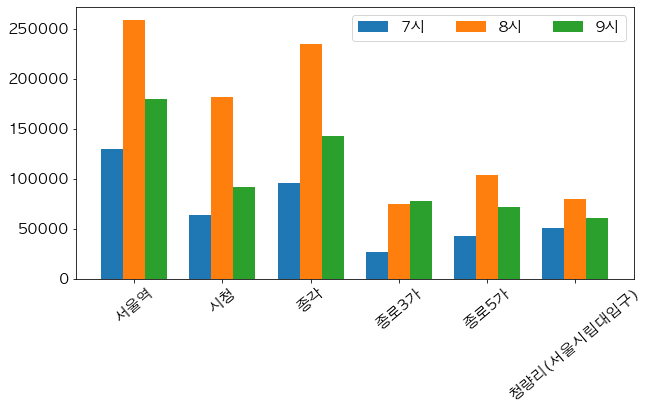

In [125]:
w = 0.25 # w =width

# 이른아침시간대 
plt.figure(figsize = (10,5))

plt.bar(index - w, df_TOP6_line1['7시승하차인원'],width = w, label ='7시')
plt.bar(index, df_TOP6_line1['8시승하차인원'],width = w, label = '8시')
plt.bar(index + w , df_TOP6_line1['9시승하차인원'],width = w, label = '9시')
plt.legend(ncol=3)
plt.xticks(index, df_TOP6_line1['SUB_STA_NM'], rotation = 40)
plt.show()



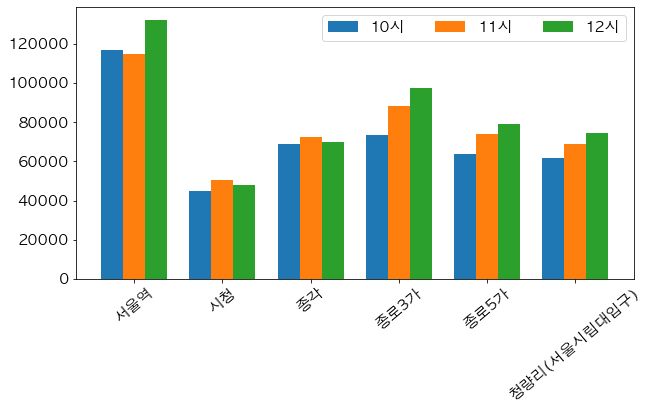

In [126]:
# 오전 (10시~12시)
plt.figure(figsize = (10,5))


w = 0.25
plt.bar(index - w, df_TOP6_line1['10시승하차인원'],width = w, label ='10시')
plt.bar(index, df_TOP6_line1['11시승하차인원'],width = w, label = '11시')
plt.bar(index + w , df_TOP6_line1['12시승하차인원'],width = w, label = '12시')
plt.xticks(index, df_TOP6_line1['SUB_STA_NM'], rotation = 40)
plt.legend(ncol=3)
plt.show()


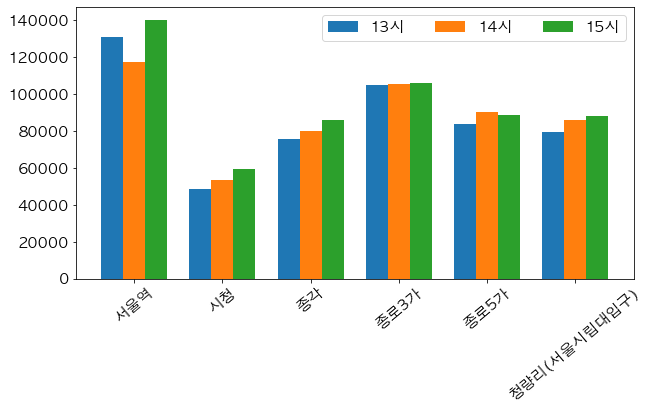

In [127]:
# 이른오후 (13시 ~ 15시)
plt.figure(figsize = (10,5))
w = 0.25
plt.bar(index - w, df_TOP6_line1['13시승하차인원'],width = w, label ='13시')
plt.bar(index, df_TOP6_line1['14시승하차인원'],width = w, label = '14시')
plt.bar(index + w , df_TOP6_line1['15시승하차인원'],width = w, label = '15시')
plt.xticks(index, df_TOP6_line1['SUB_STA_NM'], rotation = 40)
plt.legend(ncol=3)
plt.show()


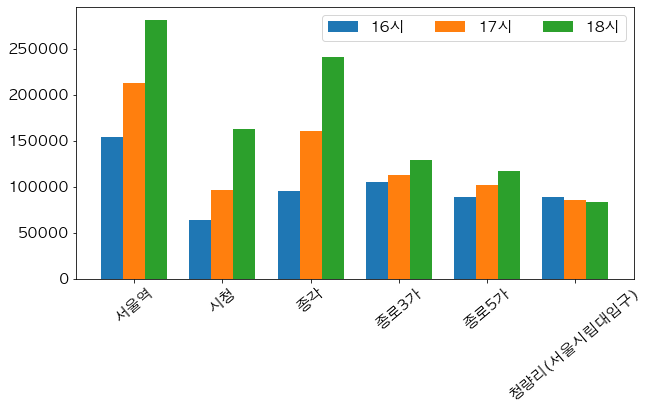

In [128]:
# 늦은오후(16시~18시)

plt.figure(figsize = (10,5))
w = 0.25
plt.bar(index - w, df_TOP6_line1['16시승하차인원'],width = w, label ='16시')
plt.bar(index, df_TOP6_line1['17시승하차인원'],width = w, label = '17시')
plt.bar(index + w , df_TOP6_line1['18시승하차인원'],width = w, label = '18시')
plt.xticks(index, df_TOP6_line1['SUB_STA_NM'], rotation = 40)
plt.legend(ncol=3)
plt.show()

In [ ]:
# 저녁시간대 (19시 ~ 22시)

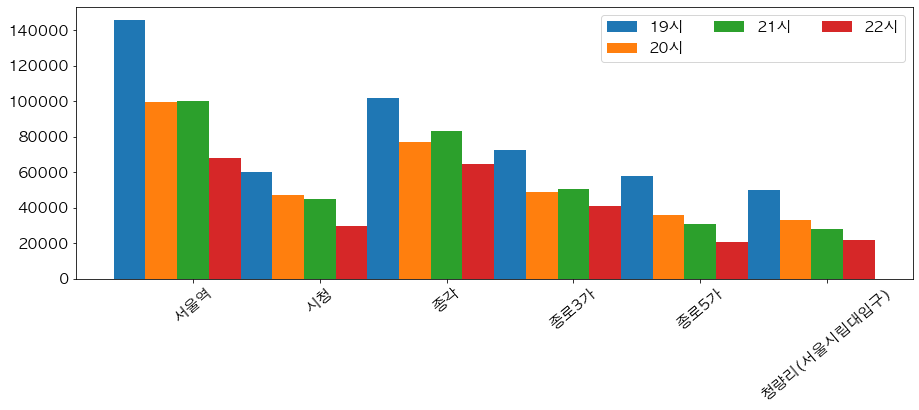

In [136]:
plt.figure(figsize = (15,5))
w = 0.25
plt.bar(index - w - w , df_TOP6_line1['19시승하차인원'],width = w, label ='19시')
plt.bar(index -w, df_TOP6_line1['20시승하차인원'],width = w, label = '20시')
plt.bar(index , df_TOP6_line1['21시승하차인원'],width = w, label = '21시')
plt.bar(index + w  , df_TOP6_line1['22시승하차인원'],width = w, label = '22시')
plt.xticks(index, df_TOP6_line1['SUB_STA_NM'], rotation = 40)
plt.legend(ncol=3)
plt.show()

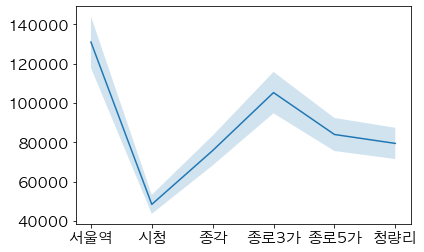

In [139]:
from matplotlib import pyplot as plt


# 13시 승하차승객수

labels = range(6)
sta_names = ["서울역", "시청", "종각", "종로3가", "종로5가", "청량리"]
people = [130950, 48464, 75803, 105256, 83975, 79442  ]
plt.plot(labels, people)
# plt.bar(labels, people)
ax = plt.subplot()
ax.set_xticks(labels)
ax.set_xticklabels(sta_names)
y_lower = [i*0.9 for i in people]
y_upper = [i*1.1 for i in people]
plt.fill_between(labels, y_lower, y_upper, alpha=0.2)
plt.show()

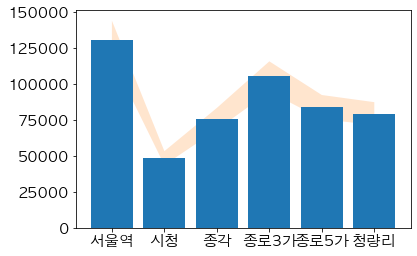

In [140]:
from matplotlib import pyplot as plt


# 13시 승하차승객수

labels = range(6)
sta_names = ["서울역", "시청", "종각", "종로3가", "종로5가", "청량리"]
people = [130950, 48464, 75803, 105256, 83975, 79442  ]
plt.bar(labels, people)
# plt.bar(labels, people)
ax = plt.subplot()
ax.set_xticks(labels)
ax.set_xticklabels(sta_names)
y_lower = [i*0.9 for i in people]
y_upper = [i*1.1 for i in people]
plt.fill_between(labels, y_lower, y_upper, alpha=0.2)
plt.show()